In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [3]:
cars.shape

(1950, 15)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Assemble        1950 non-null   object 
 1   Type            1950 non-null   object 
 2   Km              1950 non-null   int64  
 3   CarColor        1950 non-null   object 
 4   InteriorColor   1950 non-null   object 
 5   CarDoor         1950 non-null   int64  
 6   CarSeat         1950 non-null   int64  
 7   Gearbox         1950 non-null   object 
 8   Price           1950 non-null   int64  
 9   Location        1950 non-null   object 
 10  Status          1950 non-null   object 
 11  EngineCar       1950 non-null   object 
 12  Capacity        1950 non-null   float64
 13  Trademark       1950 non-null   object 
 14  ProductionYear  1950 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 228.6+ KB


# Visualing data 


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


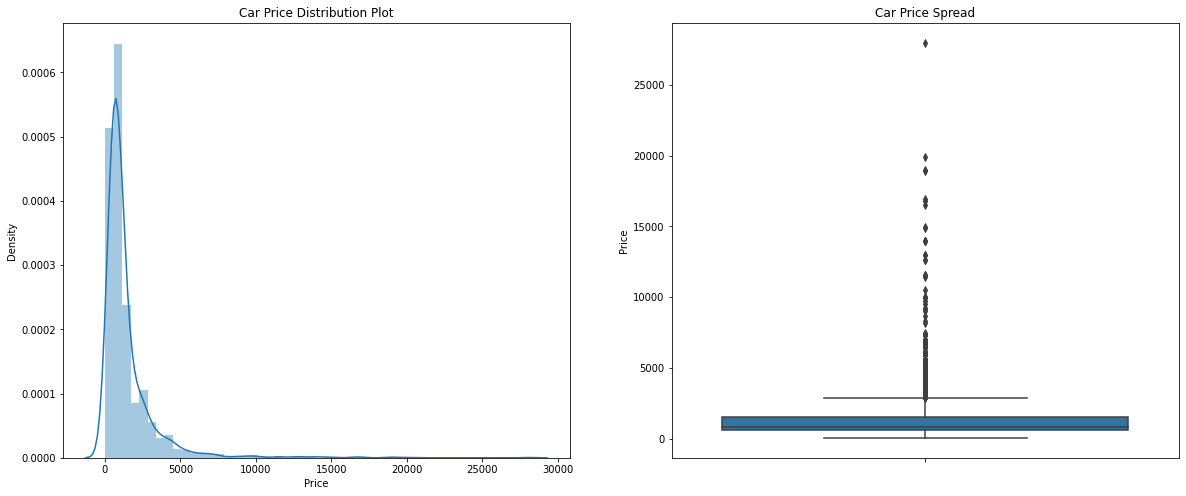

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

Các Categorical Data:
---
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

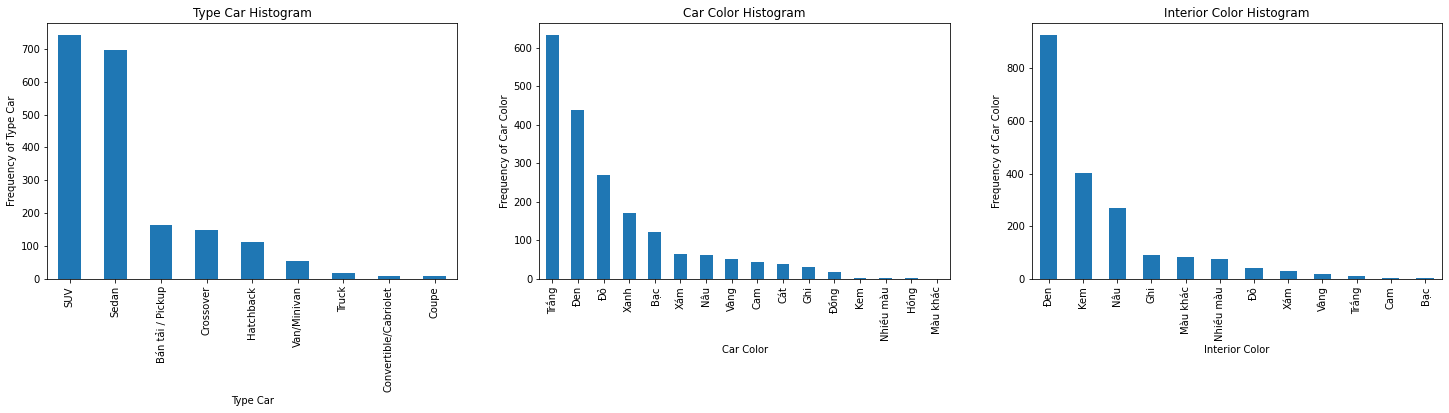

In [6]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(332)
plt1 = cars.CarColor.value_counts().plot(kind = 'bar')
plt.title('Car Color Histogram')
plt1.set(xlabel = 'Car Color', ylabel='Frequency of Car Color')

plt.subplot(333)
plt1 = cars.InteriorColor.value_counts().plot(kind = 'bar')
plt.title('Interior Color Histogram')
plt1.set(xlabel = 'Interior Color', ylabel='Frequency of Car Color')

plt.show()

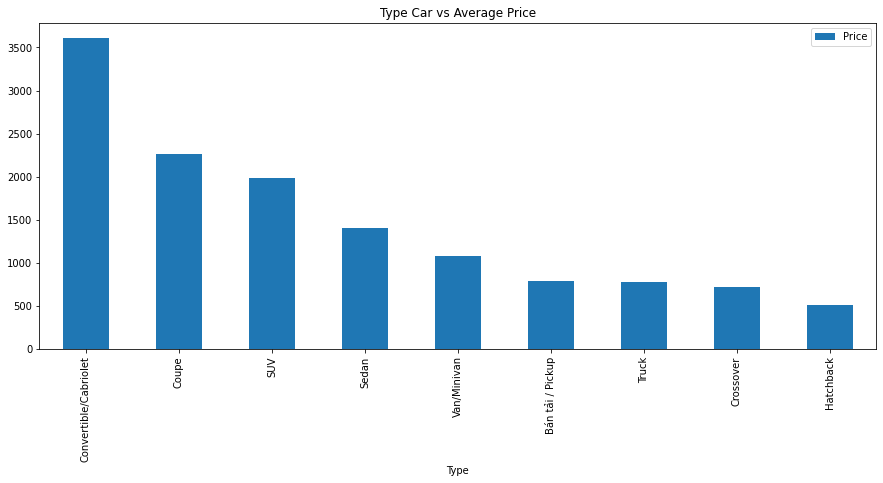

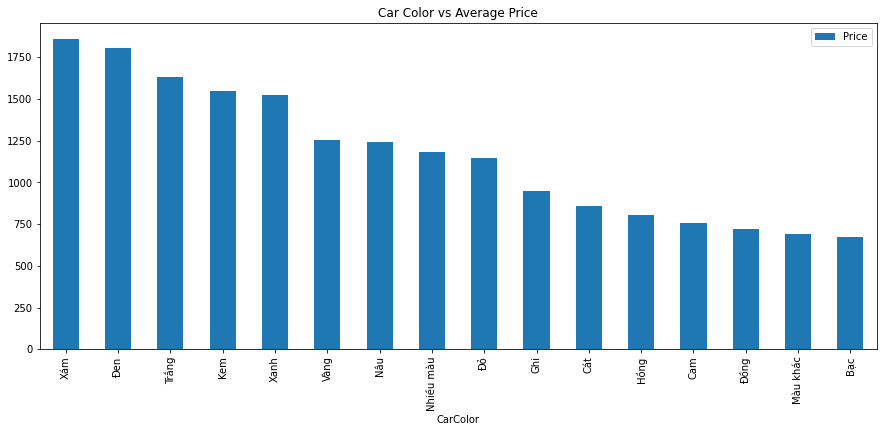

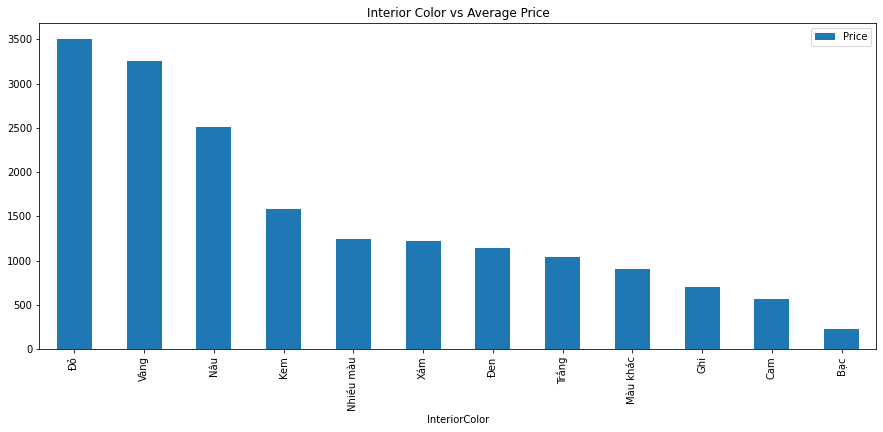

In [7]:
df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Type Car vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['CarColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Car Color vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['InteriorColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Interior Color vs Average Price')
plt.show()

KL:
1. SUV là loại xe được ưa chuộng nhiều nhất.
2. Màu xe trắng là màu được đăng bán nhiều nhất, nhưng mức giá của màu ô tô xám là cao nhất.
3. Màu nội thắng màu đen được ưa chuộng nhiều nhất, nhưng mức giá của màu đỏ là cao nhất.

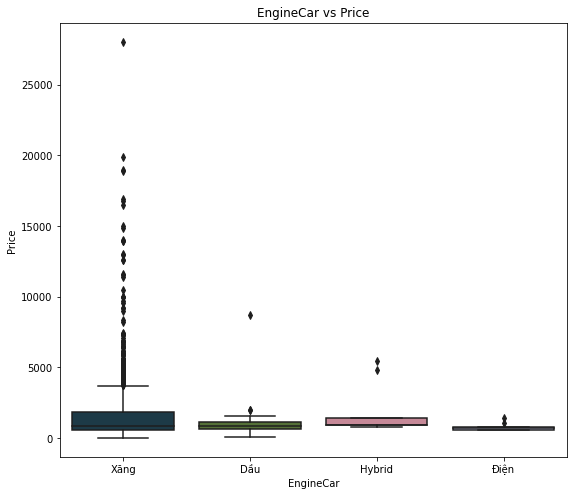

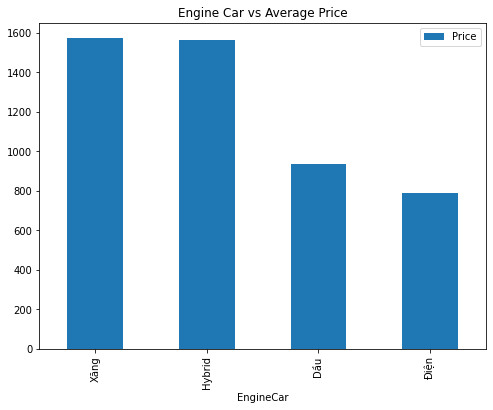

In [8]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
plt.title('EngineCar vs Price')
sns.boxplot(x=cars.EngineCar, y=cars.Price, palette=("cubehelix"))

df = pd.DataFrame(cars.groupby(['EngineCar'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Car vs Average Price')
plt.show()
plt.show()




 Kết luận:
- Loại xe chạy bằng nhiên liệu xăng được ưa chuộng nhiều nhất, sau đó đến dầu.
- Xe chạy bằng xăng cũng có mức giá bán cao nhất trong các loại.
- Hybrid cũng là loại nhiên liệu có mức giá cao, dù không được chuộng.

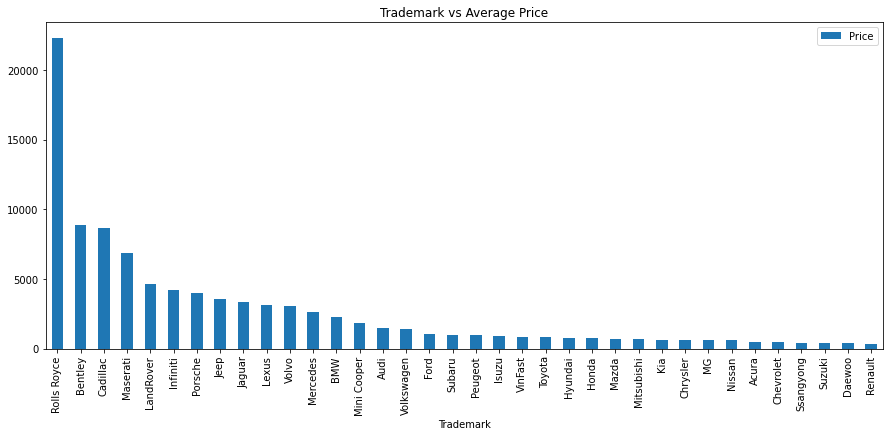

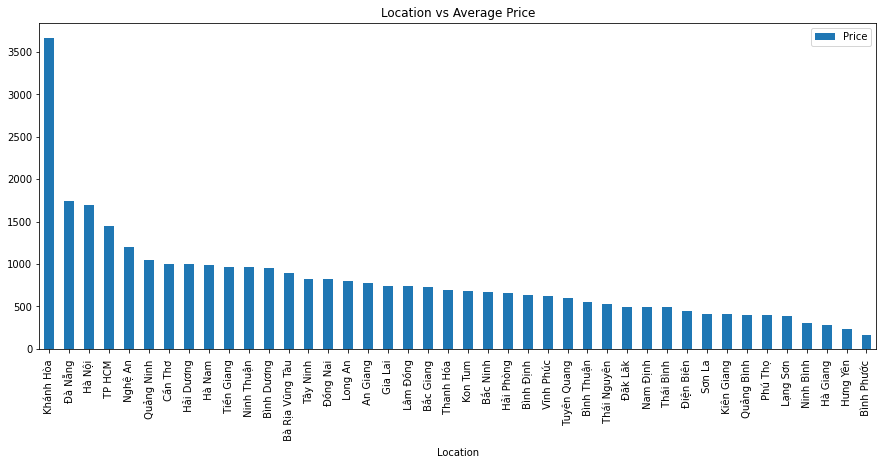

In [9]:


df = pd.DataFrame(cars.groupby(['Trademark'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))

plt.title('Trademark vs Average Price')
plt.show()


df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Location vs Average Price')
plt.show()


Kết luận:
- Dòng xe của hãng Rolls Royce có mức giá rất cao.
- Tỉnh Khánh Hòa là nơi có mức giá bán xe cao nhất.
- Đà Nẵng - Hà Nội - HCM là 3 nơi có mức giá bán cao ngang nhau sau tỉnh Khánh Hòa. Trong khi các nơi khác mức giá không chênh lệch nhiều.

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


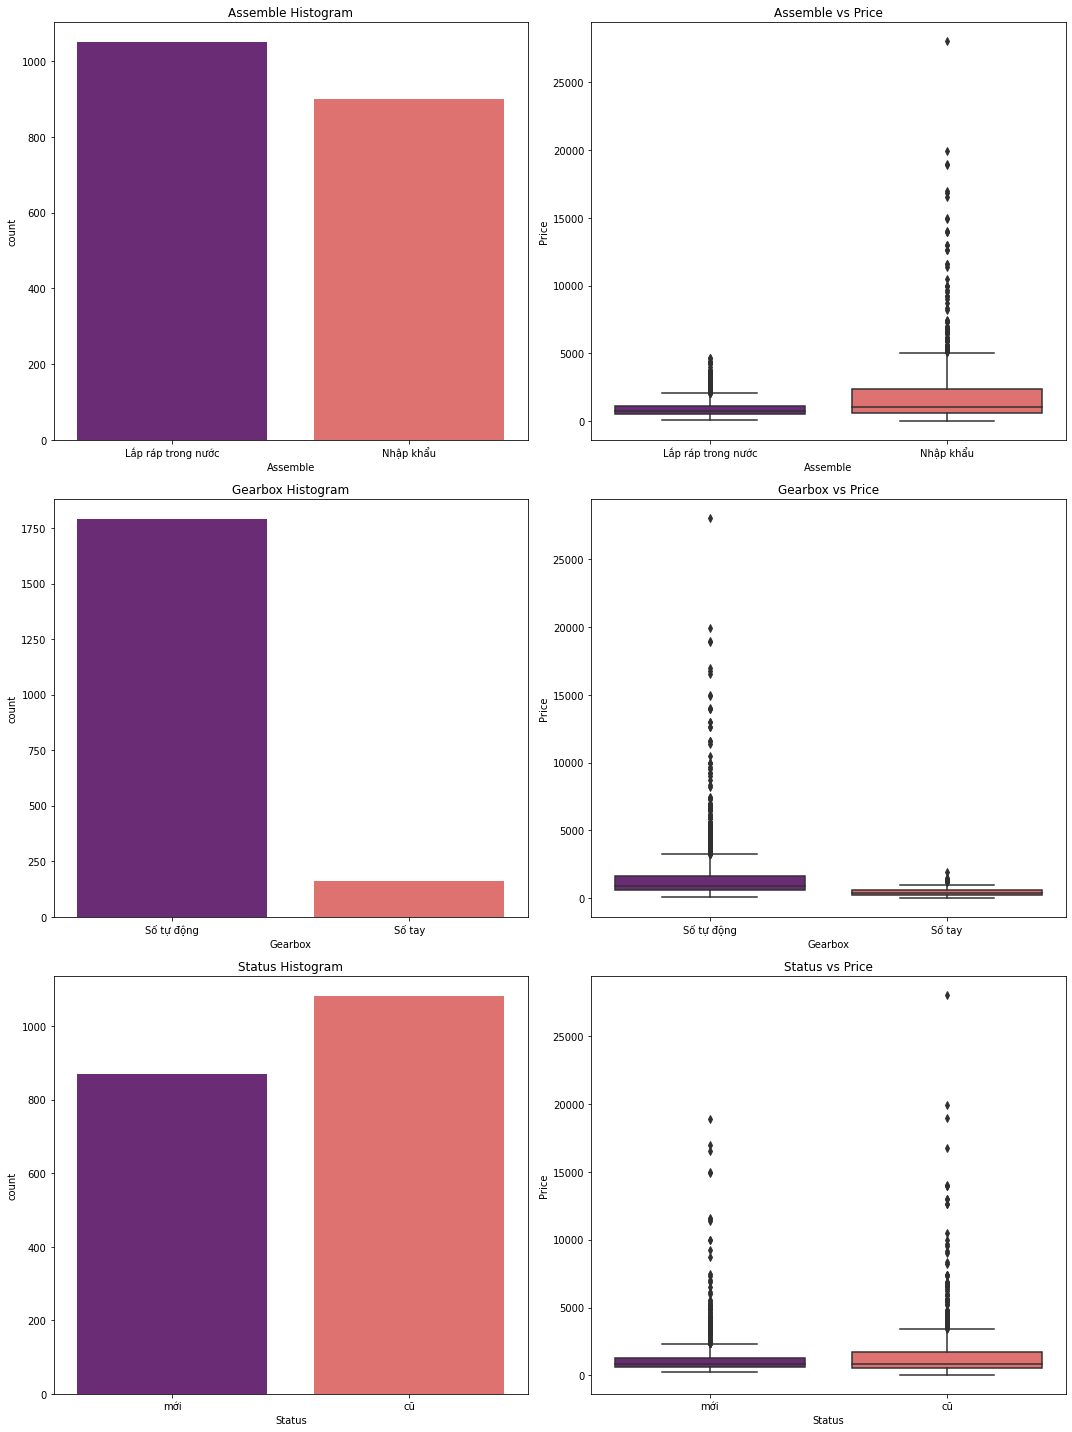

In [10]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Assemble', 1)
plot_count('Gearbox', 3)
plot_count('Status', 5)


plt.tight_layout()

Kết luận:
- Loại xe nhập khẩu có mức giá bán cao hơn loại lắp ráp trong nước. Nên loại lắp ráp trong nước được nhiều người bán hơn.
- Hiện này xe số tự động được ưa chuộng và có giá bán cao hơn loại số tay.
- Loại xe mới hoặc cũ không ảnh hưởng quá nhiều tới giá xe. 
- Có thể thấy rõ không có nhiều sự khác biệt giữa 2 loại này. Dù vẫn có ngoại lệ ở loại xe cũ nhưng không đáng kể.


Numeric Data
---
- Km
- CarDoor
- CarSeat
- Capacity
- ProductionYear

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


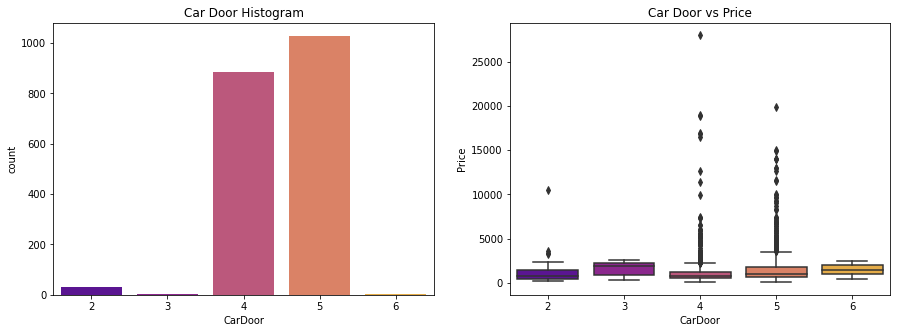

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


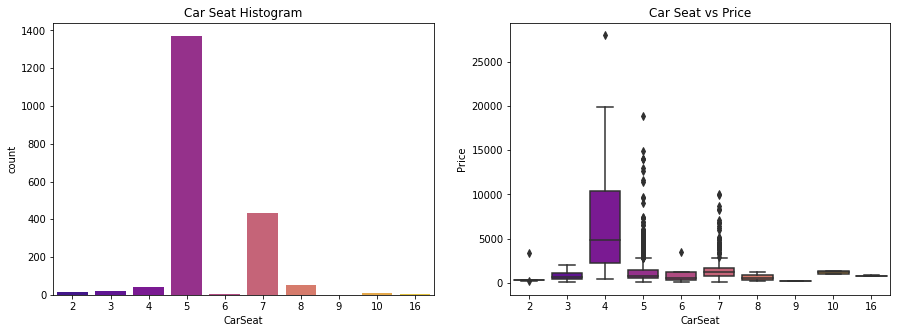

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Door Histogram')
sns.countplot(cars.CarDoor, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Door vs Price')
sns.boxplot(x=cars.CarDoor, y=cars.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Seat Histogram')
sns.countplot(cars.CarSeat, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Seat vs Price')
sns.boxplot(x=cars.CarSeat, y=cars.Price, palette=("plasma"))

plt.show()

Kết luận:
- Số lượng xe 4 và 5 cửa được ưa chuộng nhiều nhất. Dù loại xe 3 và 6 cửa không được chuộng nhưng có tầm giá bán cao nhất trong các loại.
- Loại chỗ 5 và 7 được ưa chuộng nhiều nhất. Tuy nhiên loại xe 4 chỗ ngồi lại có tầm giá cao nhất.

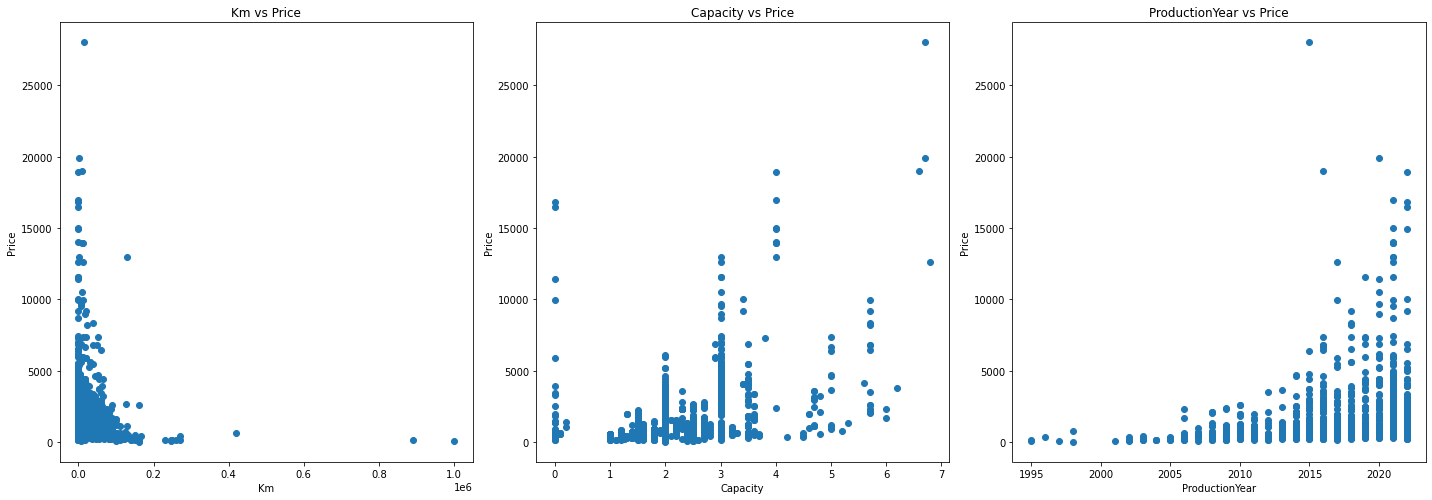

In [12]:
def scatter(x,fig):
    plt.subplot(3,3,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Km', 1)
scatter('Capacity', 2)
scatter('ProductionYear', 3)



plt.tight_layout()

Kết luận:
- Số km đã chạy của ô tô ảnh hưởng tiêu cực tới giá tiền.
- Giá xe bán qua từng năm có sự tương quan tích cực tới giá tiền, đặc biệt từ khoảng năm 2015 đến nay.
- Dung tích xăng cũng không có ý nghĩa quá nhiều tới giá tiền của 1 xe.

Các đặc trưng có ảnh hưởng tới giá tiền (Price) sau khi đã trực quan hóa dữ liệu:
---

- Km
- ProductionYear
- CarColor
- CarSeat
- CarType
- CarDoor
- EngineCar
- Gearbox
- Assemble

In [13]:
cars_lr = cars[['Price', 'Km', 'ProductionYear','CarColor', 'CarSeat','CarDoor', 'Type',
                  'EngineCar', 'Gearbox', 'Assemble']]
cars_lr.head()

,Price,Km,ProductionYear,CarColor,CarSeat,CarDoor,Type,EngineCar,Gearbox,Assemble
0,2049,0,2022,Trắng,5,5,SUV,Xăng,Số tự động,Lắp ráp trong nước
1,1989,0,2022,Trắng,7,5,SUV,Xăng,Số tự động,Nhập khẩu
2,1083,0,2022,Xanh,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước
3,925,0,2022,Đỏ,5,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước
4,2879,0,2021,Đen,5,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước


# Outlier Handling


### Khảo sát

<AxesSubplot:>

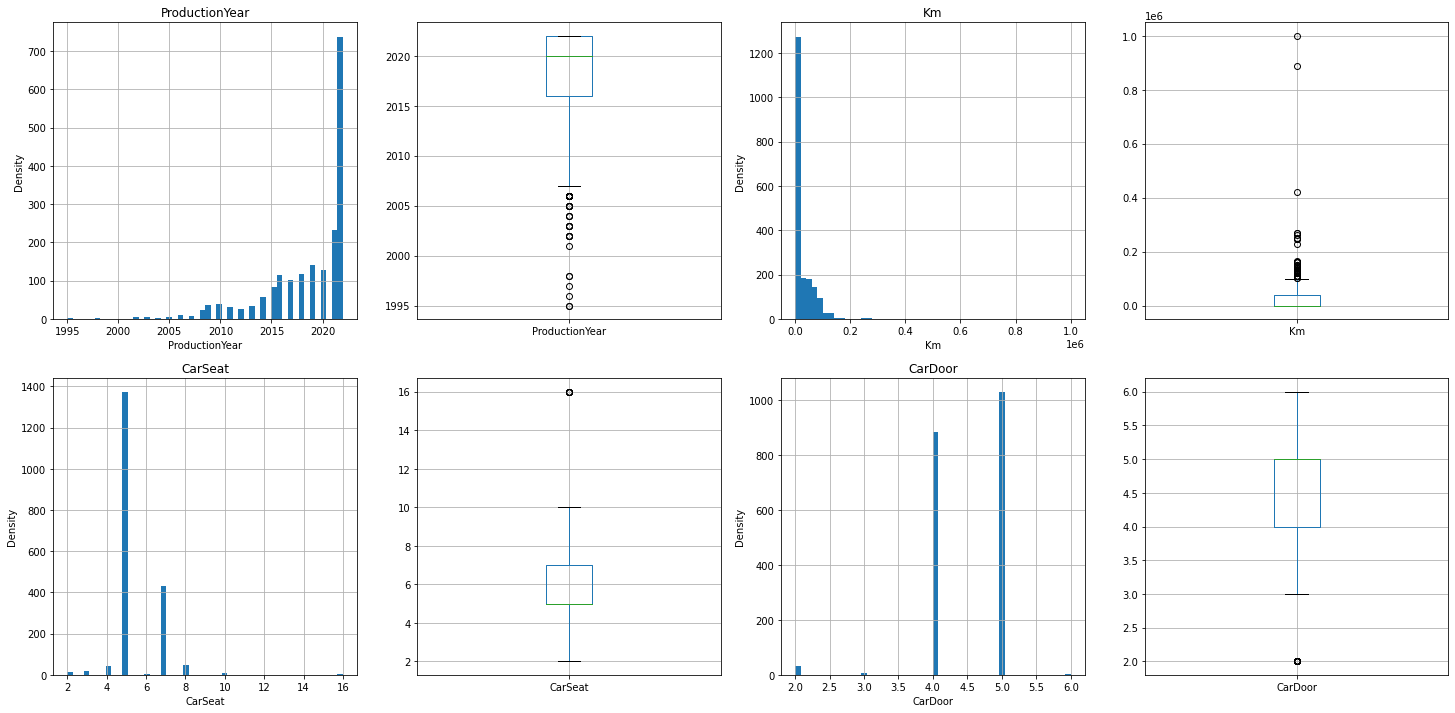

In [14]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=cars_lr.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
cars_lr.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=cars_lr.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
cars_lr.boxplot(column="Km")

plt.subplot(2,4,5)
figure=cars_lr.CarSeat.hist(bins=50)
figure.set_title('CarSeat')
figure.set_xlabel('CarSeat')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
cars_lr.boxplot(column="CarSeat")

plt.subplot(2,4,7)
figure=cars_lr.CarDoor.hist(bins=50)
figure.set_title('CarDoor')
figure.set_xlabel('CarDoor')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
cars_lr.boxplot(column="CarDoor")



Kết luận:
- Có thể thấy đặc trưng ProductionYear có nhiều giá trị ngoại lệ lệch dưới và đặc trưng Km cũng có nhiều giá trị ngoại lệ lệch trên.
- Trong khi đó đặc trưng CarSeat và CarDoor không có nhiều giá trị ngoại lệ.

=> Nên ta xử lý ngoại lệ cho 2 đặc trưng ProductionYear và Km.


### Áp dụng xử lý ngoại lệ

In [15]:
cars_outlier = cars_lr.copy()

#Km
IQR = cars_outlier.Km.quantile(0.75)-cars_outlier.Km.quantile(0.25)
# lower_bridge=cars_outlier['Km'].quantile(0.25)-(IQR*3)
upper_bridge = cars_outlier['Km'].quantile(0.75)+(IQR*3)

cars_outlier.loc[cars_outlier['Km'] >= round(upper_bridge), 'Km'] = round(upper_bridge)

#ProductionYear
IQR = cars_outlier.ProductionYear.quantile(0.75) - cars_outlier.ProductionYear.quantile(0.25)
lower_bridge = cars_outlier['ProductionYear'].quantile(0.25)-(IQR*3)
cars_outlier.loc[cars_outlier['ProductionYear'] < round(lower_bridge), 'ProductionYear'] = round(lower_bridge)


### Kết quả xử lý ngoại lệ

<AxesSubplot:>

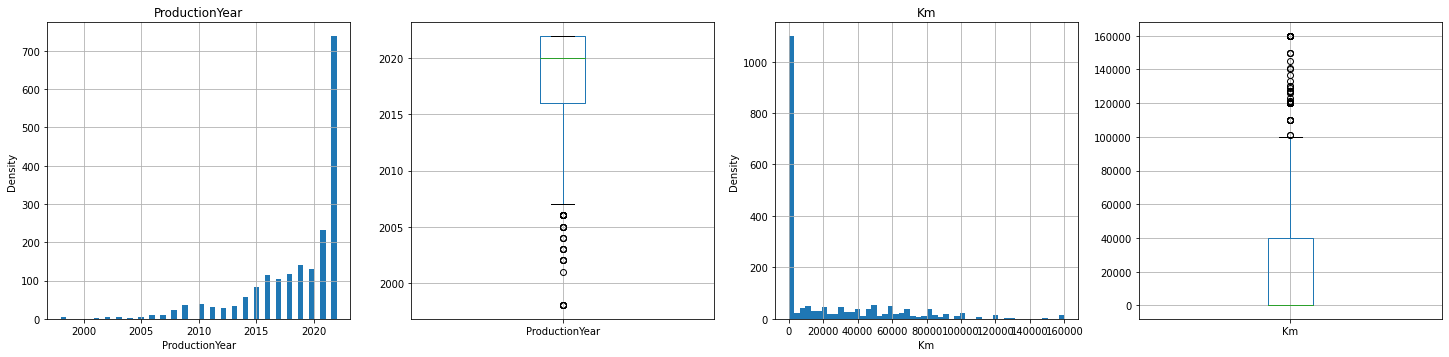

In [16]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=cars_outlier.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
cars_outlier.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=cars_outlier.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
cars_outlier.boxplot(column="Km")

-> Một số giá trị lệch quá cao và quá thấp đã được xử lý, mặc dù vẫn còn nhiều giá trị nằm ngoài mức phân bố.

# Dummy Encoding

In [17]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_outlier

cars_outlier = dummies('CarColor',cars_outlier)
cars_outlier = dummies('Type',cars_outlier)
cars_outlier = dummies('EngineCar',cars_outlier)
cars_outlier = dummies('Gearbox',cars_outlier)
cars_outlier = dummies('Assemble',cars_outlier)


In [18]:
cars_outlier.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,Cam,Cát,Ghi,Hồng,Kem,...,Hatchback,SUV,Sedan,Truck,Van/Minivan,Hybrid,Xăng,Điện,Số tự động,Nhập khẩu
0,2049,0,2022,5,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1989,0,2022,7,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
2,1083,0,2022,7,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,925,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2879,0,2021,5,4,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [19]:
cars_outlier.shape

(1950, 33)

# Chia tập Train / Test và chuẩn hóa dữ liệu 
    


In [20]:
from sklearn.model_selection import train_test_split

